In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import os
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<ipython-input-1-9054ec257a34>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
os.chdir(r'C:\Users\koush\Desktop\cgm')

In [3]:
files= glob.glob("*.csv")

In [4]:
files

['CGMDatenumLunchPat1.csv',
 'CGMSeriesLunchPat1.csv',
 'HortonGeneralHospital.csv']

In [5]:
csv_file = pd.read_csv("HortonGeneralHospital.csv")

In [6]:
csv_file

,Unnamed: 0,Cardio,Resp,Hypo,Adm,year,month
0,1,1,0,0,413,1999,11
1,2,1,0,0,443,1999,12
2,3,1,0,0,378,2000,1
3,4,0,0,0,385,2000,2
4,5,1,0,0,388,2000,3
...,...,...,...,...,...,...,...
134,135,0,0,0,541,2011,1
135,136,1,0,0,457,2011,2
136,137,3,0,0,560,2011,3
137,138,1,0,0,514,2011,4


In [7]:
csv_file.dtypes

Unnamed: 0    int64
Cardio        int64
Resp          int64
Hypo          int64
Adm           int64
year          int64
month         int64
dtype: object

In [8]:
def convert_to_period(x):
    return datetime.strptime(x, "%Y %m")

In [9]:
hp_df= pd.read_csv("HortonGeneralHospital.csv", parse_dates=[["year", "month"]], date_parser=convert_to_period, keep_date_col=True)

In [10]:
hp_df

,year_month,Unnamed: 0,Cardio,Resp,Hypo,Adm,year,month
0,1999-11-01,1,1,0,0,413,1999,11
1,1999-12-01,2,1,0,0,443,1999,12
2,2000-01-01,3,1,0,0,378,2000,1
3,2000-02-01,4,0,0,0,385,2000,2
4,2000-03-01,5,1,0,0,388,2000,3
...,...,...,...,...,...,...,...,...
134,2011-01-01,135,0,0,0,541,2011,1
135,2011-02-01,136,1,0,0,457,2011,2
136,2011-03-01,137,3,0,0,560,2011,3
137,2011-04-01,138,1,0,0,514,2011,4


In [11]:
del hp_df["Unnamed: 0"]

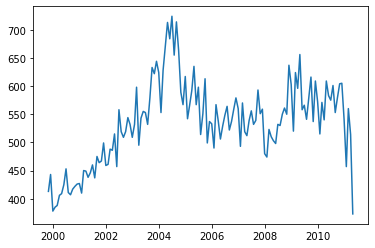

In [12]:
import matplotlib.pyplot as plt
plt.plot(hp_df["year_month"],hp_df["Adm"])

array([<AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>], dtype=object)

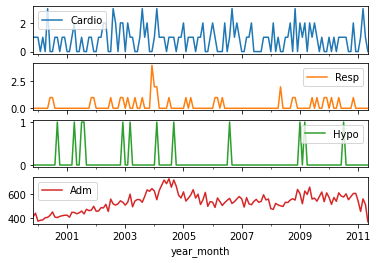

In [13]:
hp_df.set_index("year_month")[["Cardio","Resp","Hypo","Adm"]]. plot(subplots=True)

In [14]:
hp_df.describe()

,Cardio,Resp,Hypo,Adm
count,139.000000,139.000000,139.000000,139.000000
mean,0.863309,0.251799,0.086331,534.985612
std,0.852970,0.565859,0.281868,73.129524
min,0.000000,0.000000,0.000000,373.000000
25%,0.000000,0.000000,0.000000,491.500000
50%,1.000000,0.000000,0.000000,539.000000
75%,1.000000,0.000000,0.000000,579.000000
max,3.000000,4.000000,1.000000,724.000000


In [15]:
hp_input=hp_df[["Adm"]]

In [16]:
scaler=MinMaxScaler()
data_scaled= scaler.fit_transform(hp_input)

In [17]:
data_scaled

array([[0.11396011],
       [0.1994302 ],
       [0.01424501],
       [0.03418803],
       [0.04273504],
       [0.09401709],
       [0.1025641 ],
       [0.14814815],
       [0.22792023],
       [0.10826211],
       [0.0968661 ],
       [0.12535613],
       [0.13960114],
       [0.15099715],
       [0.15384615],
       [0.10541311],
       [0.21937322],
       [0.21652422],
       [0.18518519],
       [0.20797721],
       [0.24786325],
       [0.18233618],
       [0.29059829],
       [0.25925926],
       [0.26780627],
       [0.35897436],
       [0.24501425],
       [0.25071225],
       [0.32763533],
       [0.32193732],
       [0.4045584 ],
       [0.23931624],
       [0.52706553],
       [0.41595442],
       [0.38746439],
       [0.41595442],
       [0.48717949],
       [0.45299145],
       [0.38746439],
       [0.45299145],
       [0.64102564],
       [0.34757835],
       [0.48433048],
       [0.51851852],
       [0.51282051],
       [0.45299145],
       [0.58689459],
       [0.740

In [18]:
training_size=int(len(data_scaled)*0.65)
test_size=len(data_scaled)-training_size
train_data,test_data=data_scaled[0:training_size,:],data_scaled[training_size:len(data_scaled),:1]

In [19]:
training_size,test_size

(90, 49)

In [20]:
scaler.inverse_transform(test_data)

array([[512.],
       [539.],
       [556.],
       [532.],
       [539.],
       [593.],
       [551.],
       [559.],
       [480.],
       [474.],
       [523.],
       [510.],
       [503.],
       [498.],
       [532.],
       [530.],
       [550.],
       [561.],
       [550.],
       [637.],
       [603.],
       [520.],
       [624.],
       [596.],
       [656.],
       [558.],
       [566.],
       [541.],
       [579.],
       [616.],
       [537.],
       [609.],
       [572.],
       [515.],
       [571.],
       [540.],
       [609.],
       [583.],
       [575.],
       [601.],
       [553.],
       [579.],
       [604.],
       [605.],
       [541.],
       [457.],
       [560.],
       [514.],
       [373.]])

In [21]:
import numpy as np
def prepare_dataset(dataset, time_step=1):
    x, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

In [22]:
time_step = 3
x_train, y_train = prepare_dataset(train_data, time_step)
x_test, y_test = prepare_dataset(test_data, time_step)

In [23]:
x_test.shape, x_train.shape, y_train.shape, y_test.shape

((45, 3), (86, 3), (86,), (45,))

In [24]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [26]:
model = Sequential()
model.add(LSTM(50, activation="relu",input_shape= (3,1), return_sequences=True))
model.add(LSTM(50,activation="relu", return_sequences=True))
model.add(LSTM(50)) 
model.add(Dense(1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=20,verbose=1)

Epoch 1/50
5/5 [==============================] - 5s 204ms/step - loss: 0.2508 - val_loss: 0.2510
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.2103 - val_loss: 0.2042
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.1684 - val_loss: 0.1505
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.1328 - val_loss: 0.0916
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0766 - val_loss: 0.0381
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0405 - val_loss: 0.0141
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0380 - val_loss: 0.0180
Epoch 8/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0410 - val_loss: 0.0151
Epoch 9/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0362 - val_loss: 0.0159
Epoch 10/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0288 - val_loss: 0.0213
Epoch 11/50
5/5 [===========

In [30]:
import tensorflow as tf

In [31]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [32]:
len(train_predict)

86

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.10563544007933029

In [34]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.1216860503131852

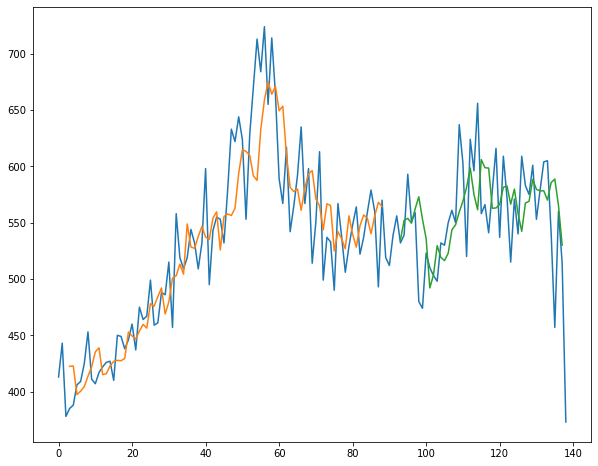

In [35]:
import numpy
look_back=3
trainPredictPlot = numpy.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_scaled)-1, :] = test_predict
# plot baseline and predictions
fig=plt.figure(figsize=(10,8))
fig=plt.plot(scaler.inverse_transform(data_scaled))
fig=plt.plot(scaler.inverse_transform(trainPredictPlot))
fig=plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

In [36]:
scaler.inverse_transform(trainPredictPlot)

array([[         nan],
       [         nan],
       [         nan],
       [422.47623576],
       [422.78400275],
       [397.38385869],
       [400.3885501 ],
       [404.45864993],
       [413.68411226],
       [421.94317327],
       [435.32762451],
       [438.91803192],
       [415.01951962],
       [415.93358125],
       [422.84011349],
       [426.85111608],
       [427.81768215],
       [427.41700397],
       [429.46128015],
       [452.83563456],
       [449.40596497],
       [446.67522138],
       [453.87341127],
       [459.67044882],
       [456.39873452],
       [478.15912062],
       [475.81158075],
       [484.32508838],
       [492.0493426 ],
       [468.94756567],
       [479.67310637],
       [500.72807565],
       [502.90975201],
       [513.13784862],
       [504.30043849],
       [548.86026359],
       [528.38621411],
       [527.22183257],
       [537.75104845],
       [546.68514603],
       [537.19230515],
       [534.96155804],
       [554.08264202],
       [559

In [37]:
len(test_data)

49

In [106]:
from numpy import array
x_input=array(test_data[45:-1].reshape(1,-1))
x_input

array([[0.23931624, 0.53276353, 0.4017094 ]])

In [107]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [108]:
(temp_input)

[0.23931623931623935, 0.5327635327635327, 0.4017094017094016]

In [109]:
from numpy import array

lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape((1,3,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1,3,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.37441146]
1 day input [0.53276353 0.4017094  0.37441146]
1 day output [[0.4984762]]
2 day input [0.4017094  0.37441146 0.49847621]
2 day output [[0.43734834]]
3 day input [0.37441146 0.49847621 0.43734834]
3 day output [[0.4468855]]
4 day input [0.49847621 0.43734834 0.4468855 ]
4 day output [[0.50085485]]
5 day input [0.43734834 0.4468855  0.50085485]
5 day output [[0.47663534]]
6 day input [0.4468855  0.50085485 0.47663534]
6 day output [[0.49245885]]
7 day input [0.50085485 0.47663534 0.49245885]
7 day output [[0.51488656]]
8 day input [0.47663534 0.49245885 0.51488656]
8 day output [[0.5104747]]
9 day input [0.49245885 0.51488656 0.51047468]
9 day output [[0.5222498]]
[0.37441146, 0.4984762, 0.43734834, 0.4468855, 0.50085485, 0.47663534, 0.49245885, 0.51488656, 0.5104747, 0.5222498]


In [110]:
lst=array(lst_output).reshape(-1,1)

In [111]:
scaler.inverse_transform(lst)

array([[504.41843],
       [547.96515],
       [526.5093 ],
       [529.8568 ],
       [548.80005],
       [540.299  ],
       [545.8531 ],
       [553.72516],
       [552.17664],
       [556.3097 ]], dtype=float32)

In [114]:
day_new=np.arange(1,50)
day_pred=np.arange(50,60)

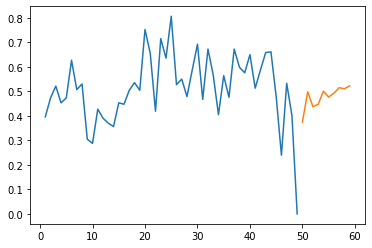

In [120]:
plt.plot(day_new,data_scaled[90:])
plt.plot(day_pred,lst)

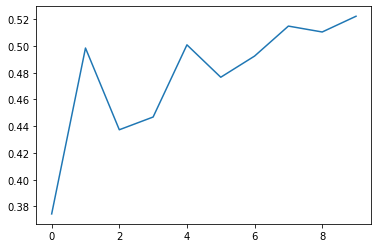

In [122]:
df4=data_scaled.tolist()
df4.extend(lst)
plt.plot(df4[139:])

In [124]:
df4=scaler.inverse_transform(df4).tolist()

In [125]:
df4

[[145335.99999999997],
 [155866.0],
 [133050.99999999997],
 [135507.99999999997],
 [136561.0],
 [142878.99999999997],
 [143932.0],
 [149548.0],
 [159376.0],
 [144634.0],
 [143230.0],
 [146740.0],
 [148495.0],
 [149899.0],
 [150249.99999999997],
 [144283.0],
 [158323.0],
 [157972.0],
 [154111.0],
 [156919.0],
 [161833.0],
 [153760.0],
 [167098.0],
 [163237.0],
 [164290.0],
 [175522.0],
 [161482.0],
 [162184.0],
 [171661.0],
 [170958.99999999997],
 [181138.0],
 [160780.0],
 [196231.0],
 [182542.0],
 [179032.0],
 [182542.0],
 [191317.0],
 [187105.0],
 [179032.0],
 [187105.0],
 [210271.0],
 [174118.0],
 [190966.0],
 [195178.0],
 [194476.0],
 [187105.0],
 [203602.0],
 [222556.0],
 [218695.0],
 [226417.0],
 [219397.0],
 [194476.0],
 [220801.0],
 [235894.0],
 [250636.0],
 [240457.0],
 [254497.0],
 [230278.0],
 [250987.00000000003],
 [233437.0],
 [207112.0],
 [199390.0],
 [216940.0],
 [190615.0],
 [198688.0],
 [208165.0],
 [223258.0],
 [199390.0],
 [210271.0],
 [180787.0],
 [193774.0],
 [21553

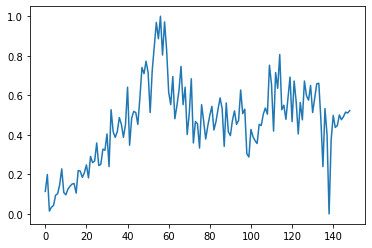

In [126]:
plt.plot(df3)

In [50]:
from __future__ import division, print_function
import seaborn as sns
import scipy as sp
from scipy import signal

In [55]:
def emd(data, nIMF=3,stoplim= .001):
    r=data
    t=np.arange(len(r))
    imfs=np.zeros(nIMF, dtype=object)
    for i in range(nIMF):
        r_t=r
        is_imf= False
        while is_imf==False:
            #we trying to identifying peaks and troughs
            pks = sp.signal.argrelmax(r_t)[0]
            trs = sp.signal.argrelmin(r_t)[0]
            
            #interpolate extrema
            pks_r=r_t[pks]
            fip=sp.interpolate.InterpolatedUnivariateSpline(pks,pks_r,k=3)
            pks_t=fip(t)
            trs_r=r_t[trs]
            fitr=sp.interpolate.InterpolatedUnivariateSpline(trs,trs_r,k=3)
            trs_t=fitr(t)
            
            #calculating mean
            mean_t=(pks_t+trs_t)/2
            mean_t= _emd_complim(mean_t,pks, trs)
            
            # Assess if this is an IMF (only look in time between peaks and troughs)
            sdk=_emd_comperror(r_t,mean_t,pks,trs)
            
            #if not imf, updating r_t and is_imf
            if sdk < stoplim:
                is_imf=True
            else:
                r_t = r_t - mean_t
        
        imfs[i] = r_t
        r =  r - imfs[i]
        return imfs
    
def _emd_comperror(h, mean, pks, trs):
    #"""Calculate the normalized error of the current component"""
    samp_start = np.max((np.min(pks),np.min(trs)))
    samp_end = np.min((np.max(pks),np.max(trs))) + 1
    return np.sum(np.abs(mean[samp_start:samp_end]**2)) / np.sum(np.abs(h[samp_start:samp_end]**2))


def _emd_complim(mean_t, pks, trs):
    samp_start = np.max((np.min(pks),np.min(trs)))
    samp_end = np.min((np.max(pks),np.max(trs))) + 1
    mean_t[:samp_start] = mean_t[samp_start]
    mean_t[samp_end:] = mean_t[samp_end]
    return mean_t

In [68]:
X=np.array(hp_input)
t=np.arange(0,len(X)*.001,1)

In [66]:
imfs= emd(X,nIMF=5)

ValueError: x and y should have a same length

In [ ]:
from PyEMD import EMD, Visualisation

s = np.random.random(100)
emd = EMD()
IMFs = emd(s)


vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)
vis.plot_instant_freq(t, imfs=imfs)
vis.show()